## Объявление библиотек, загрузка данных первичный анализ данных 

#### Загружаю необходимые библиотеки

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st
from functools import reduce
from scipy.stats import levene

#### Первичное знакомство с данными

In [57]:
data_games = pd.read_csv('df.csv')
pd.set_option('display.max_columns', None)

In [58]:
display(data_games.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
Other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [60]:
display(data_games.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [61]:
print(data_games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


## Подготовка данных

### Переименование столбцов

In [62]:
column_list = {}
for col in data_games.columns:
    column_list[col] = col.lower()
data_games = data_games.rename(columns=column_list)

### Корректировка типов данных

#### Провожу смену типов данных для экономии ресурсов

In [63]:
data_games['year_of_release'] = np.uint16(data_games['year_of_release'])
data_games['na_sales'] = np.float16(data_games['na_sales'])
data_games['eu_sales'] = np.float16(data_games['eu_sales'])
data_games['jp_sales'] = np.float16(data_games['jp_sales'])
data_games['other_sales'] = np.float16(data_games['other_sales'])
data_games['critic_score'] = np.float16(data_games['critic_score'])

#### Обработка оценок пользователей, исклбчение не корректных значений

In [64]:
print(data_games['user_score'].unique())
data_games['user_score'] = data_games['user_score'].replace('tbd', 'nan') 
data_games['user_score'] = np.float16(data_games['user_score'])

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


#### Перевод названий жанров и игр к нижнему регистру

In [65]:
data_games['genre'] = data_games['genre'].str.lower()
data_games['name'] = data_games['name'].str.lower()

### Обработка пропусков

In [66]:
columns_to_replace = ['name', 'genre', 'rating']
for val in columns_to_replace:
    data_games[val] = data_games[val].fillna('unknown')

### Суммарные продажи во всех регионах

In [67]:
def na_sales_summation(row):
    return data_games.loc[:,'na_sales'].sum()
def eu_sales_summation(row):
    return data_games.loc[:,'eu_sales'].sum()
def jp_sales_summation(row):
    return data_games.loc[:,'jp_sales'].sum()
def other_sales_summation(row):
    return data_games.loc[:,'other_sales'].sum()

data_games['na_sales_sum'] = data_games.apply(na_sales_summation, axis=1)
data_games['eu_sales_sum'] = data_games.apply(eu_sales_summation, axis=1)
data_games['jp_sales_sum'] = data_games.apply(jp_sales_summation, axis=1)
data_games['other_sales_sum'] = data_games.apply(other_sales_summation, axis=1)

display(data_games.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum
0,wii sports,Wii,2006,sports,41.375000,28.953125,3.769531,8.453125,76.0,8.000000,E,4400.0,2424.0,1298.0,791.5
1,super mario bros.,NES,1985,platform,29.078125,3.580078,6.808594,0.770020,NaN,NaN,unknown,4400.0,2424.0,1298.0,791.5
2,mario kart wii,Wii,2008,racing,15.679688,12.757812,3.789062,3.289062,82.0,8.296875,E,4400.0,2424.0,1298.0,791.5
3,wii sports resort,Wii,2009,sports,15.609375,10.929688,3.279297,2.949219,80.0,8.000000,E,4400.0,2424.0,1298.0,791.5
4,pokemon red/pokemon blue,GB,1996,role-playing,11.273438,8.890625,10.218750,1.000000,NaN,NaN,unknown,4400.0,2424.0,1298.0,791.5


## Проведение исследовательского анализа данных

### Рассматриваю, сколько игр выпускалось в разные годы и определяюсь какой период взять для анализа

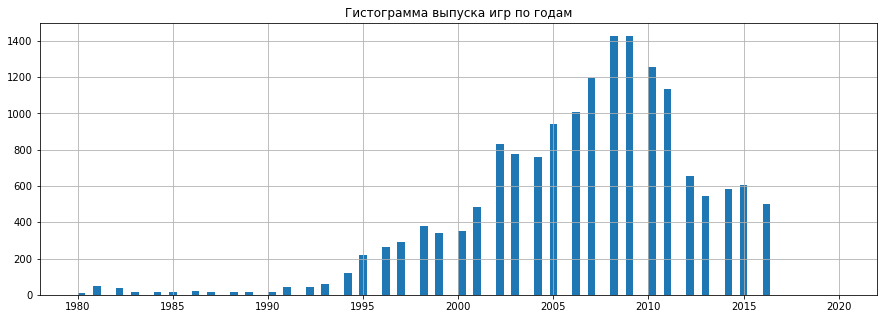

In [68]:
plt.title('Гистограмма выпуска игр по годам')
data_games['year_of_release'].hist(bins=100, range=(1980,2020), figsize=(15,5))
plt.show()
data_games = data_games.loc[data_games['year_of_release'] >= 1995]

Если рассматривать 40 летний период, то выделяется подъем спроса на индустрию игр с 1995. На текущий момент темпы меньше пиковых, но это не исключает спрос на игры. Следовательно за все периоды данные не важны, необходимо рассматривать период активного спроса - с 1995 года.

### Рассматриваю как менялись продажи по платформам. Нахожу платформы с наибольшими суммарными продажами. Нахожу характерный период возникновения новых и исчезновения старых платформ

In [69]:
#Создаем отдельный столбец в общей таблице с суммой продаж по всем регионам 
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales'] 

pvt_platfom = data_games.pivot_table(
    index=['platform'], values=['sum_sales'], aggfunc=['sum']
).reset_index()
pvt_platfom.columns = ['platform','sum_platform_sales']
pvt_platfom.sort_values(by='sum_platform_sales', ascending=False).head(10)

,platform,sum_platform_sales
12,PS2,1234.00
23,X360,961.00
13,PS3,931.50
21,Wii,891.00
3,DS,802.50
11,PS,721.50
14,PS4,314.25
5,GBA,312.75
15,PSP,289.50
1,3DS,257.75


В процессе определения платформ с максимальными продажами определились 6 фаворитов у которых количество продаж более миллиарда. Остальные уступают значительно.

'Платформа DS (млн.). Среднее значение:80, Дисперсия:3218, Стандартное отклонение:60, Нормальное распределение:260'

'Платформа PS (млн.). Среднее значение:80, Дисперсия:3464, Стандартное отклонение:62, Нормальное распределение:266'

'Платформа PS2 (млн.). Среднее значение:103, Дисперсия:5780, Стандартное отклонение:79, Нормальное распределение:340'

'Платформа PS3 (млн.). Среднее значение:85, Дисперсия:2712, Стандартное отклонение:55, Нормальное распределение:250'

'Платформа Wii (млн.). Среднее значение:81, Дисперсия:5692, Стандартное отклонение:79, Нормальное распределение:318'

'Платформа X360 (млн.). Среднее значение:80, Дисперсия:3030, Стандартное отклонение:57, Нормальное распределение:251'

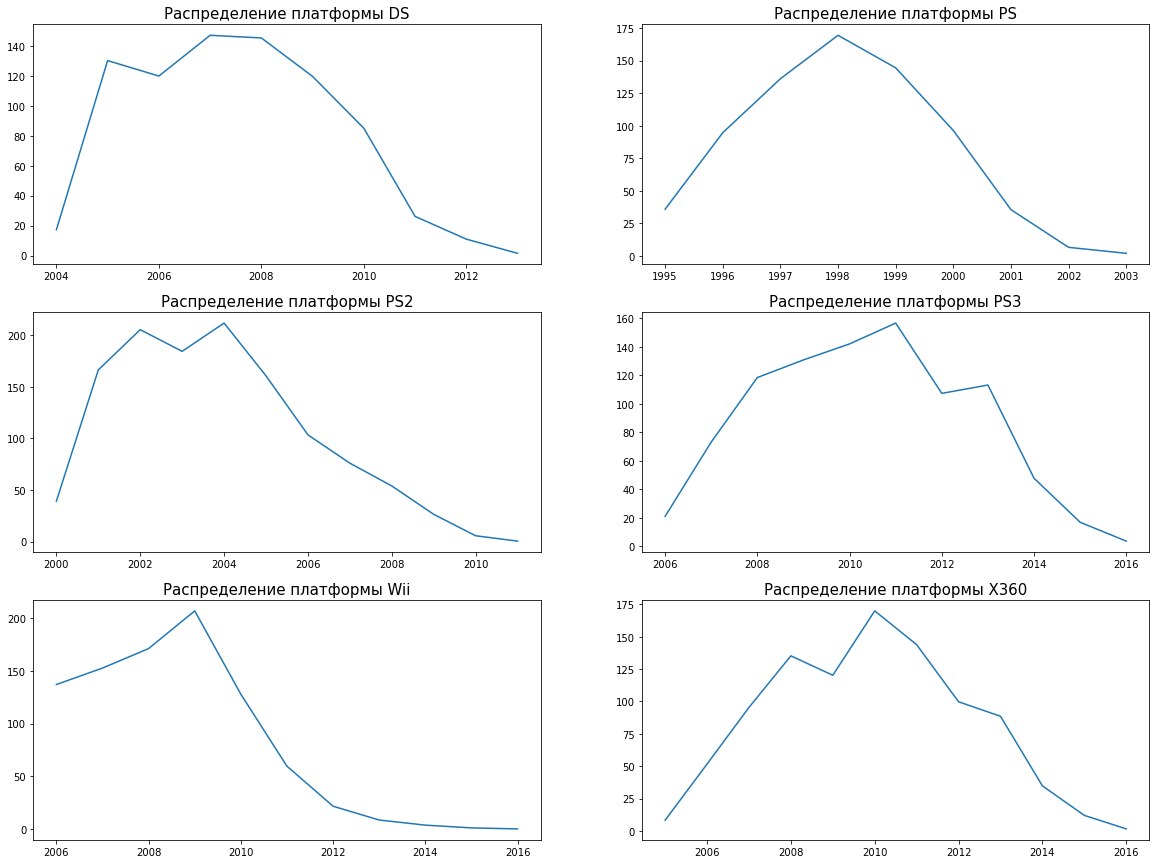

In [70]:
platform_list = pvt_platfom[pvt_platfom['sum_platform_sales'] > 700]['platform']
platform_year = data_games[data_games['platform'].isin(platform_list)]
plt.figure(figsize=(20, 15))
cnt_plt = 1
for platf in platform_list:
    data_ = platform_year.query(f'platform == "{platf}"').pivot_table(
        index='year_of_release', values='sum_sales', aggfunc='sum'
    )
    #display(data_)
    mean_ = round(data_['sum_sales'].mean())
    variance_ = round(np.var(data_['sum_sales']))
    standard_dev_ = round(np.std(data_['sum_sales'], ddof=1))
    adv_ = mean_ + (standard_dev_ * 3)

    plt.subplot(3, 2, cnt_plt)
    display(
        f'Платформа {platf} (млн.). Среднее значение:{mean_}, Дисперсия:{variance_}, Стандартное отклонение:{standard_dev_}, Нормальное распределение:{adv_}'
    )
    plt.plot(data_)
    plt.title(f'Распределение платформы {platf}', fontsize=15)
    cnt_plt +=1

Судя по распределению, время жизни той или иной платформы от 5 до 7 лет, затем приходит другая.
Если расматривать очередность из топ 6, то сначала появилась PS, которой на смену пришла PS2. После 2000 началась конкуренция за игровой рынок и тут мы видим сразу активность PS3, Wii, X360 и DS, которые являются разработками разных вендоров. Практически по всем платформам идет постепенный спад начиная с 2012 года, это может говорить о появлении новых платформ, но которые еще не набрали достаточно популярности.

### Формирование прогноза продаж на 2017 год

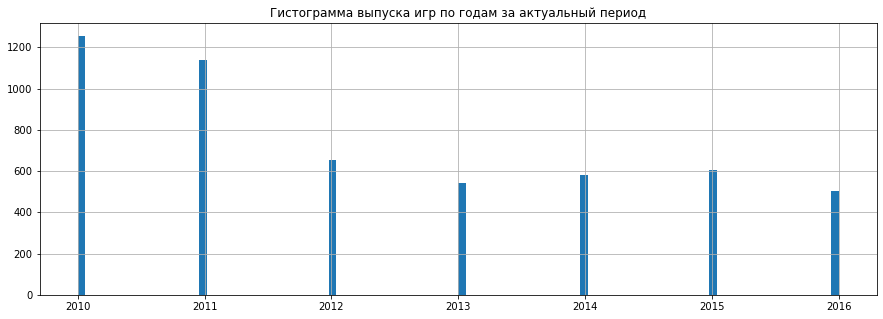

In [71]:
data_games_now = data_games.loc[data_games['year_of_release'] >= 2010]

plt.title('Гистограмма выпуска игр по годам за актуальный период')
data_games_now['year_of_release'].hist(bins=100, range=(2010,2016), figsize=(15,5))
plt.show()

Среднее время жизни платформы от 5 до 7 лет, а данные у нас до 2016 года включительно, следовательно для анализа можно взять период с 2010 года по текущий момент.

### Нахожу платформы лидирующие по продажам. Определение потенциально прибыльные платформы.

In [72]:
pvt_platfom_now = data_games_now.pivot_table(
    index=['platform'], values=['sum_sales'], aggfunc=['sum']
).reset_index()
pvt_platfom_now.columns = ['platform','sum_platform_sales']
pvt_platfom_now.sort_values(by='sum_platform_sales', ascending=False)

,platform,sum_platform_sales
4,PS3,588.000000
10,X360,550.500000
5,PS4,314.250000
0,3DS,257.750000
8,Wii,223.000000
11,XOne,159.250000
1,DS,123.750000
2,PC,121.937500
9,WiiU,82.187500
6,PSP,64.062500


In [73]:
def create_plot(data, column, pivot_column):
    plt.figure(figsize=(20,10))
    for platf in data[pivot_column].unique():
        data_ = data.query(f'{pivot_column} == "{platf}"').pivot_table(
            index='year_of_release', values=column, aggfunc='sum'
        )

        plt.plot(data_,label=platf)
        plt.legend()
        plt.grid(True)
        plt.title(f'Распределение платформы {platf}', fontsize=15)
        plt.xlabel('Год', fontsize=12, color='blue')
        plt.ylabel('Объем продаж', fontsize=12, color='blue')

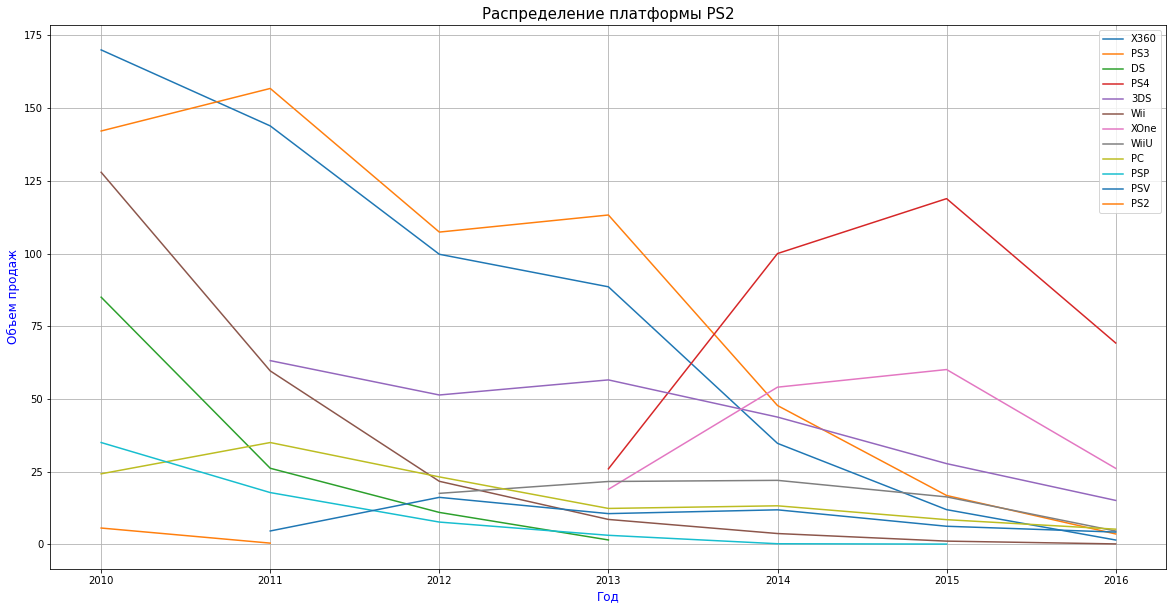

In [74]:
create_plot(data_games_now, 'sum_sales', 'platform')

По графику видно, что на текущий момент в лидерах PS4 и XOne. Начиная с 2013 года был рост, к 2016 году результаты падают. Остальные платформы постепенно снижают свою активность. Считаю, что эти две платформы потенциальные конкуренты с другими и их нужно рассматривать в первую очередь.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [75]:
def pvt_platform_top(platform, y_=12):
    data_ = data_games_now.query(f'platform == "{platform}"')['sum_sales']
    plt.title(f'Диаграмма размаха по платформе {platform}', fontsize=15)
    plt.grid(True)
    plt.boxplot(data_)
    plt.ylim(0, y_)
    plt.show()

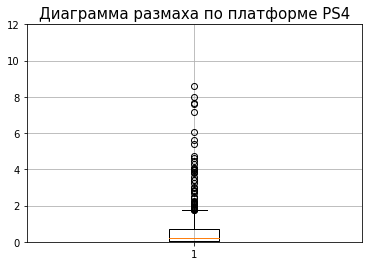

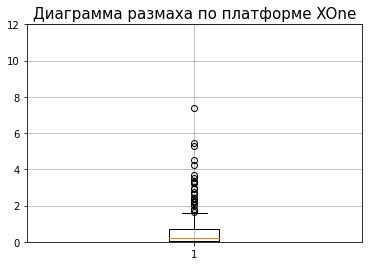

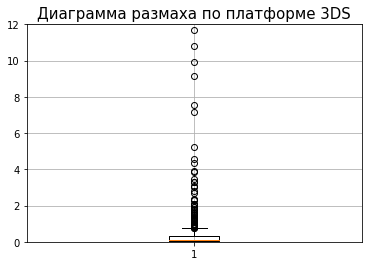

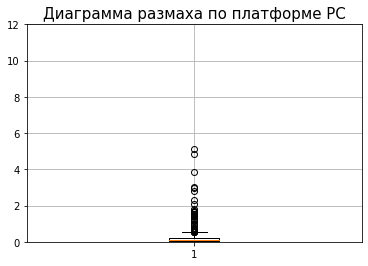

In [76]:
pvt_platform_top('PS4')
pvt_platform_top('XOne')
pvt_platform_top('3DS')
pvt_platform_top('PC')

По всем платформам наблюдаются достаточно большие выбросы, которые немного мешают восприятию. Изменим масштаб графика.

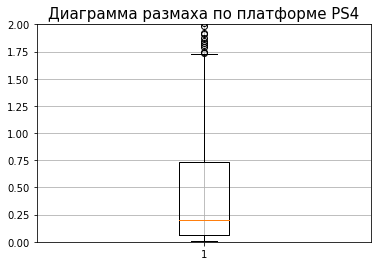

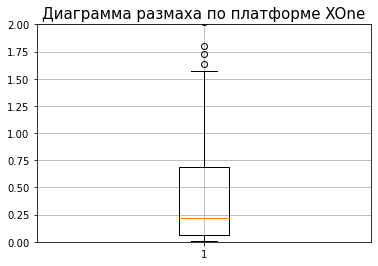

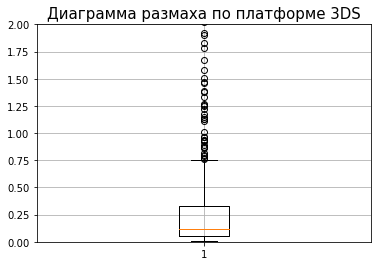

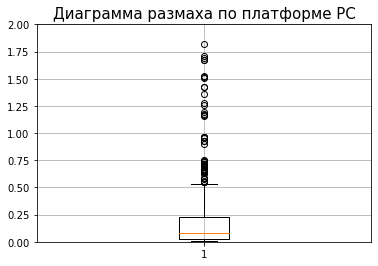

In [77]:
pvt_platform_top('PS4', 2)
pvt_platform_top('XOne', 2)
pvt_platform_top('3DS', 2)
pvt_platform_top('PC', 2)

У конкурентов PS4 и XOne медиана распологается в районе 0,25 млн, а межквартильный размах находится, примерно, от 0,1 до 0,7. 95% значений распологаются в обоих случаях до 1,75. Отличия между платформами есть, но с минимальными отклонениями.
Рассмотренные портативные и многофункциональные платформы имеют менее интенсивную статистику продаж. Медиана распологается в районе 0,1. Межквартильный размах у 3DS в районе 0,3 , а у PC 0,25. 95% всех паказаний у 3DS укладывается в 0,75, а у PC в 0,5.

### Влияния на продажи внутри одной популярной платформы на базе отзывов пользователей и критиков. Построение диаграммы рассеяния и расчет корреляции между отзывами и продажами.

In [78]:
data_ps4 = data_games_now.query(f'platform == "PS4"')

Корреляция: 0.4065802406899805


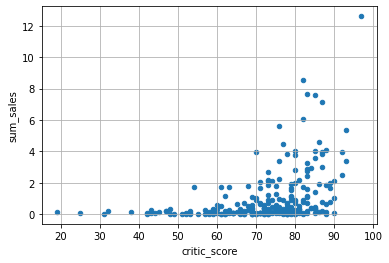

In [79]:
data_ps4.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True)
print('Корреляция:', data_ps4['critic_score'].corr(data_ps4['sum_sales']))

Диаграмма рассеивания явно показывает, что высокие оценки критиков стимулируют рост продаж у клиентов, это подтверждает и корреляция. Число положительное и достаточно высокое, значит зависимость от оценки критиков есть.

Корреляция: -0.03201493087451784


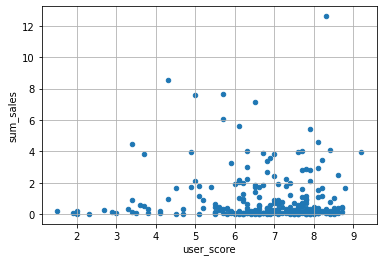

In [80]:
data_ps4.plot(x='user_score', y='sum_sales', kind='scatter', grid=True)
print('Корреляция:',data_ps4['user_score'].corr(data_ps4['sum_sales']))

Диаграмма рассеивания иллюстрирует, что интерес пользователей немного не стабилен, и оценки влияют на количество продаж, но не 100%. Корелляция подтверждает данный факт. Значение корреляции отрицательное, на уровне 0, что говорит о том, что если оценки пользователей полеятя вверх, объемы продаж скорее всего останутся на прежних уровнях.

### Соотношение выводов с продажами игр на других платформах.

Корреляция: 0.31700642654048555


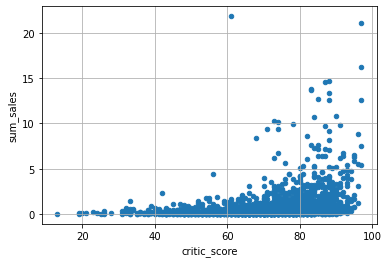

In [81]:
data_games_now.plot(x='critic_score', y='sum_sales', kind='scatter', grid=True)
print('Корреляция:', data_games_now['critic_score'].corr(data_games_now['sum_sales']))

Диаграмма рассеивания оценки критиков практически сходится по сравнению с PS4, видна закономерность увеличения продаж с ростом рейтинга критиков, но корреляция упала и уже нет такой уверенности, что с ростом оценок критиков, продажи пойдут в рост, есть небольшая вероятность, что продажи останутся на прежних показателях.

Корреляция: 0.05538444860007875


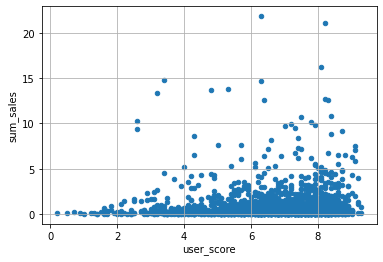

In [82]:
data_games_now.plot(x='user_score', y='sum_sales', kind='scatter', grid=True)
print('Корреляция:',data_games_now['user_score'].corr(data_games_now['sum_sales']))

Оценка пользователей по всем платформам имеет закономерность увеличения продаж с увеличением рейтинга, но все равно коррелиция на уровне ноля, следовательно делаю вывод, что высокие оценки пользователей не смогут существенно увеличить объемы продаж.

### Общее распределение игр по жанрам. Анализ жанров. Определение жанров с высокими и низкими продажами.

#### Анализ популярности жанров по выпуску игр

(-1.1068664816676281,
 1.100326975317506,
 -1.1037548295365334,
 1.1097400058533649)

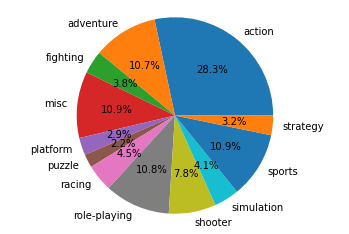

In [83]:
pvt_genre = data_games_now.pivot_table(
        index='genre', values='name', aggfunc='count'
    ).reset_index()
pvt_genre.columns = ['genre', 'cnt']

fig, ax = plt.subplots()
ax.pie(pvt_genre['cnt'], labels=pvt_genre['genre'], autopct='%1.1f%%')
ax.axis("equal")

#### Анализ жанров по продажам игр

(-1.1013391088496154,
 1.1000637670880768,
 -1.115828422828937,
 1.1096698324087126)

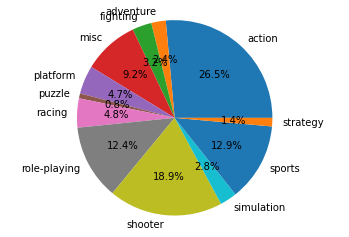

In [84]:
pvt_genre = data_games_now.pivot_table(
        index='genre', values='sum_sales', aggfunc='sum'
    ).reset_index()
pvt_genre.columns = ['genre', 'sales']

fig, ax = plt.subplots()
ax.pie(pvt_genre['sales'], labels=pvt_genre['genre'], autopct='%1.1f%%')
ax.axis("equal")

In [85]:
data_games_now.pivot_table(
    index = 'genre', 
    values = 'sum_sales', 
    aggfunc = ['sum', 'count', 'mean']
).style.background_gradient('coolwarm')

,sum,count,mean
,sum_sales,sum_sales,sum_sales
genre,,,
action,673.000000,1495,0.450195
adventure,61.000000,563,0.108337
fighting,81.562500,199,0.409912
misc,234.625000,576,0.407227
platform,119.750000,153,0.782715
puzzle,20.593750,114,0.180664
racing,122.687500,237,0.517578
role-playing,315.250000,568,0.555176


При анализе соотношение популярности жанра и покупаемости заметно, что жанр action как самый популярный среди игр, так и самый продаваемый. Следом в топ 5 по популяции жанра идут sport, adventure, misc, role-playing, но по продажам они очень сильно отстают от shooter, который менее рапрастранеен как жанр.
В плане продаж очень слабые показатели показывают жанры puzzle и strategy.
Из данной картины можно сделать вывод, что среди жанров есть явные фавориты.

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

In [86]:
def top_region(col_pivot, column, head_=5):
    region = data_games_now.loc[:,[col_pivot, column]].pivot_table(
            index=col_pivot, values=column, aggfunc='sum'
        )
    return region.sort_values(by=column,ascending=False).head(head_)

In [87]:
data_frames = [
    top_region('platform','na_sales'), 
    top_region('platform','eu_sales'), 
    top_region('platform','jp_sales'), 
    top_region('platform','other_sales')
]
top_all_region_plt = reduce(lambda  left,right: pd.merge(left,right,on=['platform'],
                                            how='outer'), data_frames)
display(top_all_region_plt)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
X360,334.2500,163.3750,NaN,47.375000
PS3,229.2500,213.6250,59.25000,85.625000
Wii,121.1875,65.9375,NaN,18.109375
PS4,108.7500,141.1250,NaN,48.343750
XOne,93.1250,NaN,NaN,14.273438
PC,NaN,68.8125,NaN,NaN
3DS,NaN,NaN,100.62500,NaN
PSP,NaN,NaN,42.18750,NaN
DS,NaN,NaN,27.90625,NaN


Анализ популярности платформы делал на базе информации по продажам.
При первичном анализе ТОП5 платформ брасается в глаза одна закономерность, что самые популярные в мире платформы (PS3, PS4, X360), совсем не популярны в Японии. Тогда как не распрастраненная по миру портативные консоли PSP, PSV, 3DS(nintendo) в Японии в разы популярнее. Можно сделать взаимосвязь с тем, что японцы достаточно трудолюбивые и рабочий день + дорога до работы в основном занимает наибольшее время жизни. На игры времени не хватает, разве что только в транспорте, пока добираются в пункт назначения.

In [88]:
#Функция построения группы графиков для платформ и жанров. Аналогично применить и к другим назначениям.
def create_plot_group(data, column, pivot_column, title):
    plt.figure(figsize=(20,20))
    cnt_plot = 1
    for col in column:
        plt.subplot(4, 1, cnt_plot)
        for platf in data[pivot_column].unique():
            data_ = data.query(f'{pivot_column} == "{platf}"').pivot_table(
                index='year_of_release', values=col, aggfunc='sum'
            )
            
            plt.plot(data_,label=platf)
            plt.legend()
            plt.grid(True)
            plt.title(f'{title} {col}', fontsize=15)
            plt.xlabel('Год', fontsize=12, color='blue')
            plt.ylabel('Объем продаж', fontsize=12, color='blue')
        cnt_plot +=1

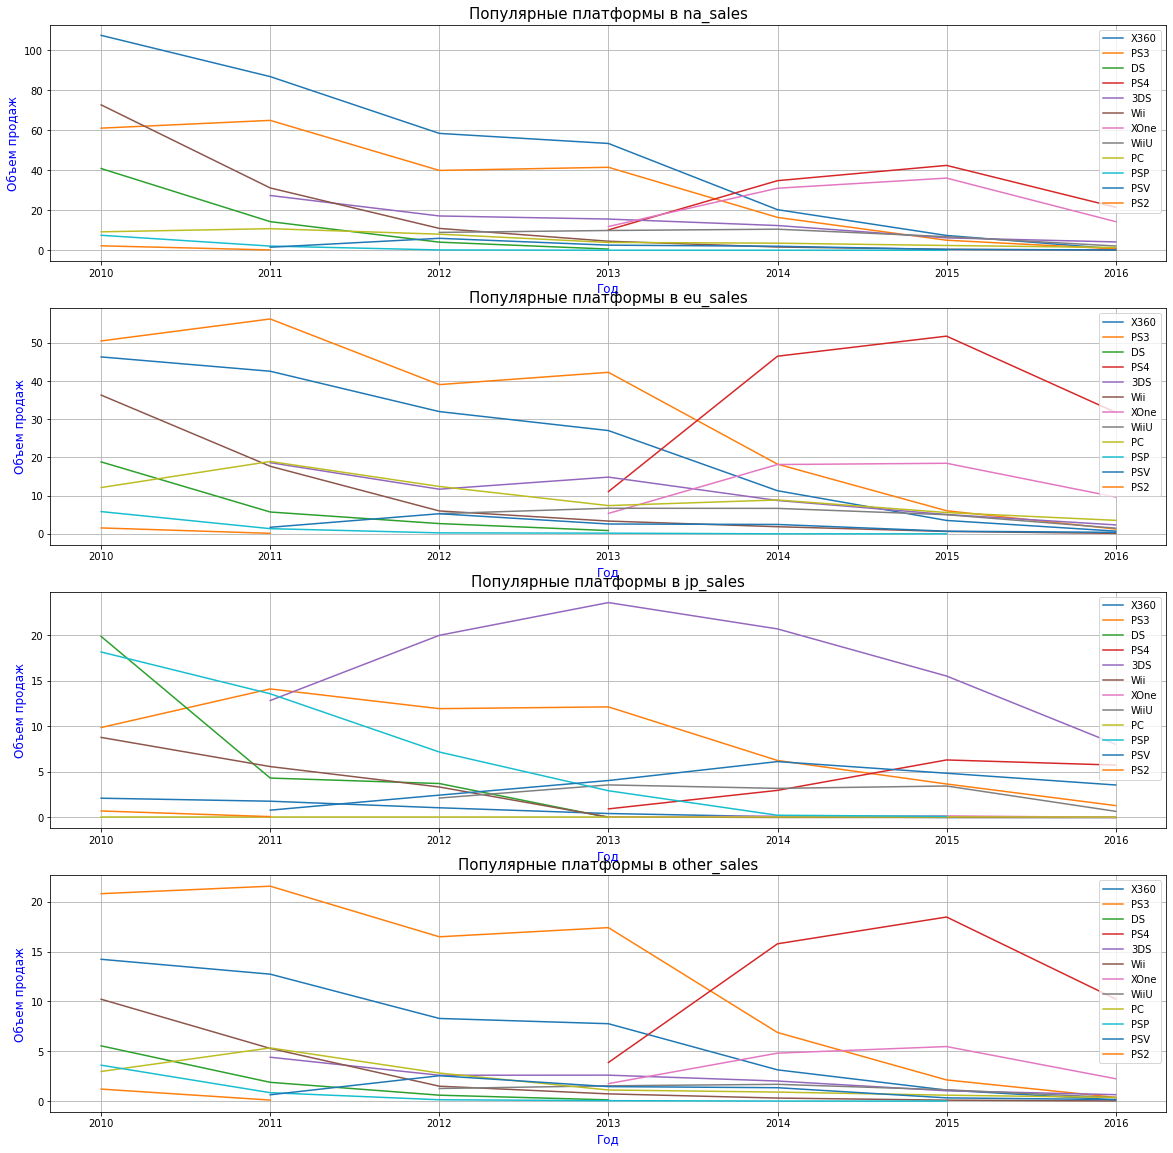

In [89]:
create_plot_group(
    data_games_now, 
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    'platform',
    'Популярные платформы в'
)

При рассмотрении графиков видно, что в Америке, Европе и отсальном мире, кроме Японии популярны игровые платформы PS4 и XOne. На текущий момент два лидера показывают достаточно стабильное лидерство по отношению к другим платформам. В Европе достаточно долго держалась платформа PS2, зато портативные форматы не приживаются в этих регионах.
По данным было замечено в Японии лидерство портативный консолей, это подтверждает и график. Пик популярности 3DS выпал на 2013 год, но и на текущий момент он не сдает позиции.

In [90]:
data_frames = [
    top_region('genre','na_sales'), 
    top_region('genre','eu_sales'), 
    top_region('genre','jp_sales'), 
    top_region('genre','other_sales')
]
top_all_region_genre = reduce(lambda  left,right: pd.merge(left,right,on=['genre'],
                                            how='outer'), data_frames)
display(top_all_region_genre)

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
action,290.7500,233.6250,72.187500,76.625000
shooter,237.5000,171.5000,NaN,56.781250
sports,156.7500,116.8125,NaN,39.218750
misc,123.8125,66.0625,24.296875,20.375000
role-playing,112.0625,75.5000,103.562500,24.203125
platform,NaN,NaN,15.812500,NaN
adventure,NaN,NaN,15.671875,NaN


При рассмотрении цифр статистики по жанрам, видна тенденция популярности жанра action и misc, role-playing во всем мире. Остальные жанры менее популярны. В Японии есть отличие от остального мира, в пятерке лидеров жанры platform, adventure, которые не сильно популярны в другом мире и отсуствует интерес к жанрам shooter и sports. Из чего можно сделать вывод, что жанры игр подбираются в Японии под портативные консоли, поэтому и такая тенденция.

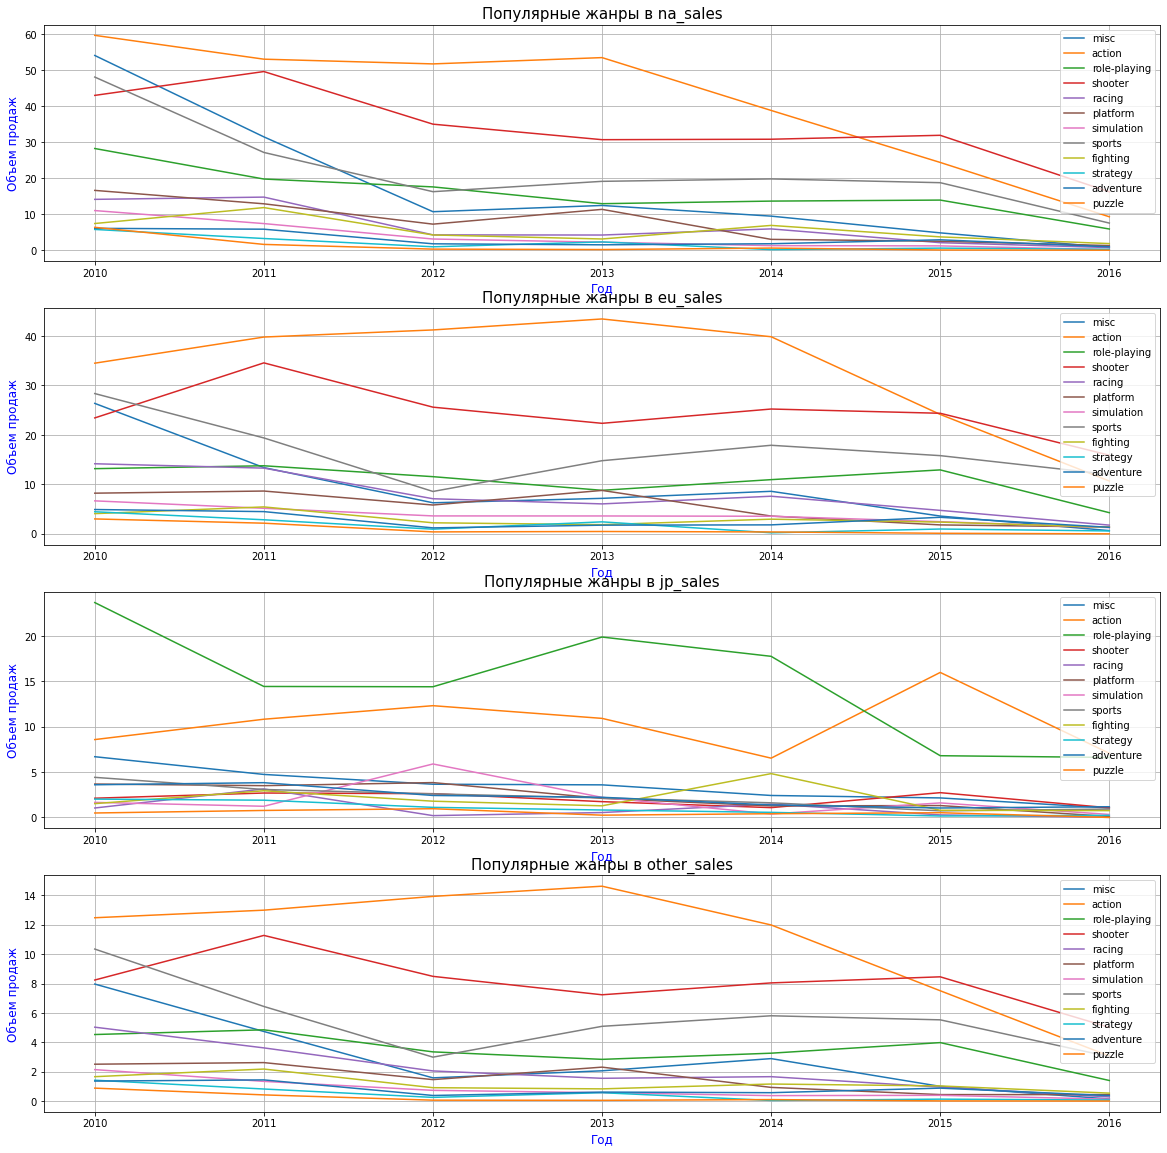

In [91]:
create_plot_group(
    data_games_now, 
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    'genre',
    'Популярные жанры в'
)

### Влияние рейтинга ESRB на продажи в отдельном регионе

EC - Раннее детство;

E - Все;

E10 + - все 10+;

Т - Подросток;

M - Зрелые;

АО - Только для взрослых;

RP - оценка ожидается;

In [92]:
# Объединяю и группирую данные по рэйтингу
data_frames = [
    top_region('rating','na_sales', 10), 
    top_region('rating','eu_sales', 10), 
    top_region('rating','jp_sales', 10), 
    top_region('rating','other_sales', 10)
]
top_all_region_rating = reduce(lambda  left,right: pd.merge(left,right,on=['rating'],
                                            how='outer'), data_frames).T
# Складываю значения по типу рейтинга и делю на безрейтинговый показания. 
# Получая таким образом влияние рейтинга на общие продажи.
top_all_region_rating['unknow_perc'] = top_all_region_rating['unknown'] / (
    top_all_region_rating['M'] + top_all_region_rating['E'] + top_all_region_rating['T'] + top_all_region_rating['E10+'] 
    + top_all_region_rating['unknown'] + top_all_region_rating['EC'] + top_all_region_rating['RP']
) * 100
display(top_all_region_rating)

rating,M,E,T,E10+,unknown,EC,RP,unknow_perc
na_sales,382.250000,271.25000,160.75000,159.37500,155.75,1.129883,0.000000,13.781250
eu_sales,292.000000,197.37500,113.06250,99.25000,139.50,0.000000,0.029999,16.578125
jp_sales,30.453125,47.87500,42.12500,13.21875,171.50,0.000000,0.000000,56.250000
other_sales,97.000000,60.03125,38.71875,31.15625,40.50,0.070007,0.010002,15.140625


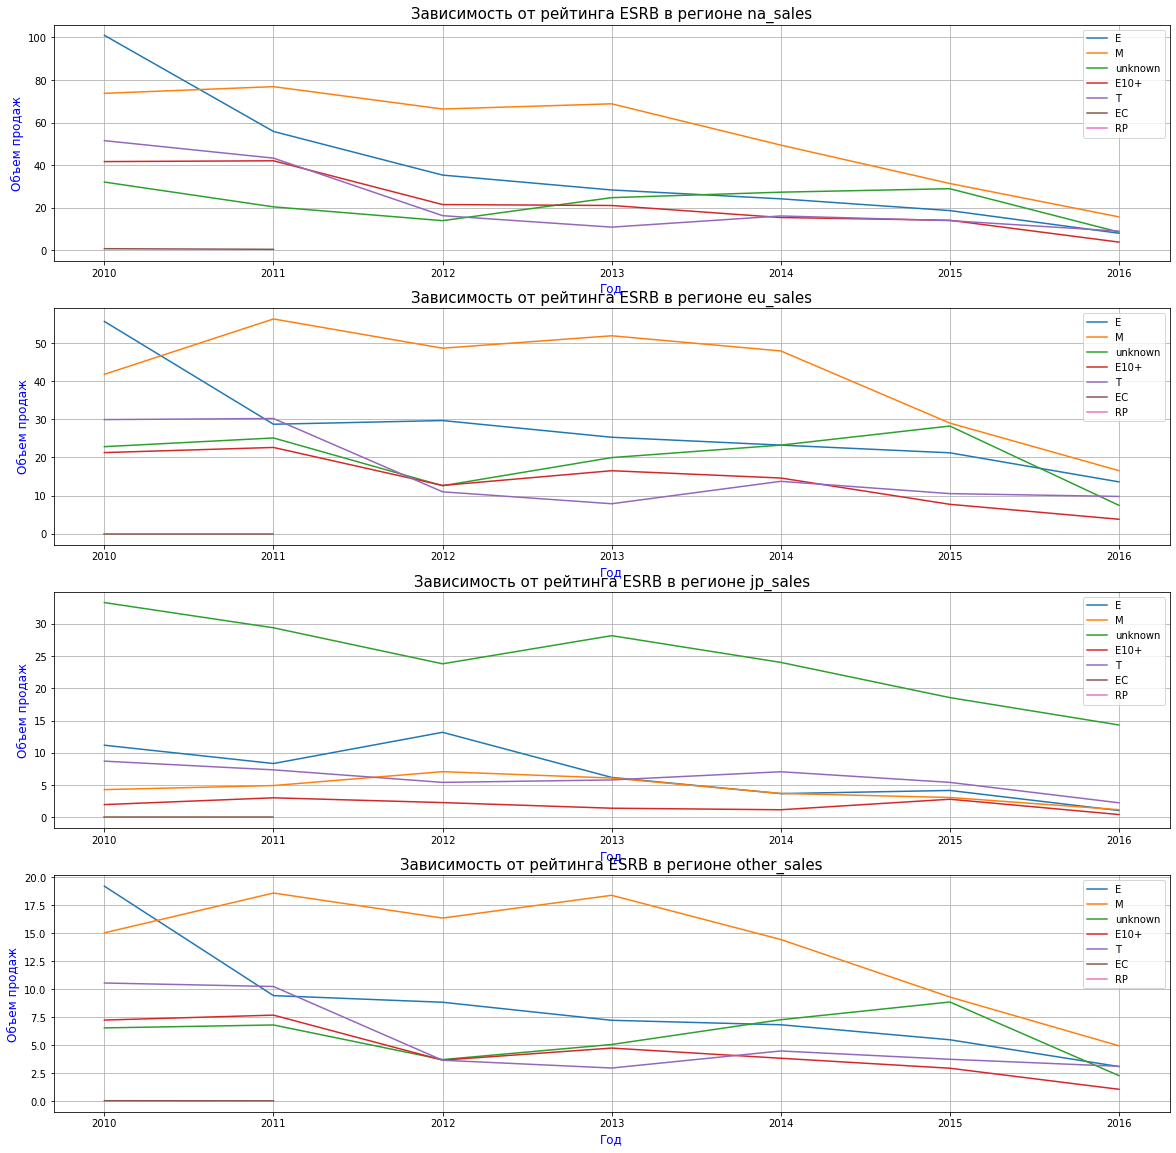

In [93]:
create_plot_group(
    data_games_now, 
    ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 
    'rating',
    'Зависимость от рейтинга ESRB в регионе'
)

Рассмотривая данные по рейтингу в Америке, можно заметить, что доля игр без рейтинга существенна, практически 14%. Но судя по графику это не влияет на рост и снижение продаж игр.
Япония напротив показывает антирекорд данной выборки. Более половины игр (56%) не оценены ESRB и если сравнивать с показателями Америки, уровень продаж игр практически в 5 раз ниже. На графике заметно, что в последние годы количество не оцененных игр становится меньше, но и продажи падают практически аналогичными темпами.
Показатели Европы и остального мира практически одинаковы и доля неоценных игр немного выше чем в Америке.
Отсуствие рейтинга ESRB не значительно снижает шанс покупки игры пользователями. Как говорится "спрос рождает предложение", т.к. Америке и Европе объемы продаж большие, то там и стараются максимально оценить игры и дать подробную информацию пользовтаелям. В Японии такой потребности нет, там и продажи ниже чем сравниваемых регионах, следовательно нет смысла тратить на это деньги и время.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [94]:
def ttest_games (column, test_column, cnt_random):
    value_one = data_games_now.loc[data_games_now[column] == test_column[0]]['user_score'].sample(n=cnt_random, random_state=1)
    value_two = data_games_now.loc[data_games_now[column] == test_column[1]]['user_score'].sample(n=cnt_random, random_state=1)

    equal_var_ = [np.var(x) for x in [value_one, value_two]]
    print('Дисперсии двух списков:',equal_var_)
        
    results = st.ttest_ind(value_one.dropna(), value_two.dropna(), equal_var = lambda x: True if equal_var_[0] == equal_var_[1] else False)
    alpha = 0.05
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

    stat, p = levene(value_one, value_two)
    print('Тест Левена:', p)

In [95]:
pvt_platform = data_games_now.pivot_table(
    index=['platform'], values='user_score', aggfunc=['mean']
)
ttest_games('platform', ['XOne', 'PC'], 200)

Дисперсии двух списков: [2.004, 2.496]
p-значение: 0.6493374268039155
Не получилось отвергнуть нулевую гипотезу
Тест Левена: nan


Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" 
Альтернативная гипотеза: "Средние пользовательские рейтинги плтформ Xbox One и PC одинаковые не равны между собой".
Судя по тому, что дисперсии отличаются более чем на единицу, значит equal_var должен быть False.
Результат проверки гипотезы показал, что нулевую гипотезу отвергать нельзя. Процент очень маленький, практически на пограничной отметке, но с вероятностью в 5% ситуаций можно сказать, что средний рейтинг Xbox One и PC совпадает.
Проверка тестом Левена показала, что вероятность сходства двух платформ имеет место быть с достаточно высокой вероятностью.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [96]:
pvt_genre = data_games_now.pivot_table(
    index=['genre'], values='user_score', aggfunc=['mean']
)
#display(pvt_genre)
pvt_platform = data_games_now.pivot_table(
    index=['platform'], values='user_score', aggfunc=['mean']
)
#display(pvt_platform)
ttest_games('genre', ['action', 'sports'], 500)

Дисперсии двух списков: [1.675, 2.697]
p-значение: 3.466401313589345e-09
Отвергаем нулевую гипотезу
Тест Левена: nan


Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые" 
Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные".
Судя по тому, что дисперсии отличаются более чем на единицу, значит equal_var должен быть False.
Результат анализа гипотезы показал, что нулевую гипотезу отвергаем. С высокой вероятностью можно сказать, что средний пользовательский рейтинг у жанров Action и Sports различается.
Проверка тестом Левена показала, что вероятность сходства двух жанров отсутсвует, очень маленоке число.

## Вывод

На основе полученных данных по продажам компютерных игр был произведен анализ появления новых и затухание популярности старых платформ. Определен средний срок жизни платформы, ее популярность по регионам мира. Определен рассвет игровой индустрии, который начался в далеком 1995 году, но стырые консоли уже не так популярны и в данный момент нужно брать срок в 5-7 лет для получения более актуальной статистики. На текущий момент во всем мире кроме Японии лидирую в основном платвормы линейки PS и X360. 

Но постпенно фокус внимания смещается в сторону более современных платформ от тех же брендов (PS4 \ XOne)

Япония выбрала другой формат - портативных консолей, таких PSP, DS3(nintendo). Данная закономерность привела и своей популярности в плане жанров.

По всему миру популяерны жанры игр action и role-playing, но в Японии максимальная очень популярны жанроы platform и adventure. В остальном мире играют в жанры shooter, sports.

Рассмотрены данные по рейтингу ESRB. В Америке, можно заметить, что доля игр без рейтинга существенна, практически 14%. Но судя по графику это не влияет на рост и снижение продаж игр. Япония показывает антирекорд данной выборки. Более половины игр (56%) не оценены ESRB (вероятнее всего в Японии есть свой рейтинг) и если сравнивать с показателями Америки, уровень продаж игр практически в 5 раз ниже.
Проведена проверка двух гипотез на сравнение двух плтформ, Xbox One и PC. Статистический анализ показал, что средний рейтинг у пользователей в 5% подверждает совпадает.
Вторая гипотеза проверяла сходимость жанров Action и Sports. Результат анализа опроверг данную гипотезу, и с большой вероятностью можно сказать что средний рейтинг пользователй по данным жанрам отличается.